## Q1. Consider only the below columns and prepare a prediction model for predicting Price.

     Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

In [17]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [18]:
toyo= pd.read_csv('ToyotaCorolla.csv',encoding='latin1')

In [19]:
toyo

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [20]:
toyo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [21]:
toyo.isnull().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [22]:
corel=toyo.corr().round(2)

In [23]:
corel

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,1.00,-0.74,0.91,0.04,-0.92,0.27,-0.11,-0.08,0.07,-0.12,...,-0.24,-0.24,-0.09,-0.01,-0.14,-0.03,-0.14,-0.02,-0.01,0.16
Price,-0.74,1.00,-0.88,-0.02,0.89,-0.57,0.31,0.11,0.03,0.13,...,0.34,0.36,0.06,-0.04,0.22,0.16,0.10,0.11,-0.04,-0.17
Age_08_04,0.91,-0.88,1.00,-0.12,-0.98,0.51,-0.16,-0.11,0.03,-0.10,...,-0.28,-0.28,-0.07,0.01,-0.13,-0.11,-0.12,-0.04,0.01,0.19
Mfg_Month,0.04,-0.02,-0.12,1.00,-0.06,-0.02,-0.04,0.03,0.01,0.04,...,0.01,0.03,-0.06,0.03,-0.03,0.05,0.02,0.02,0.03,-0.04
Mfg_Year,-0.92,0.89,-0.98,-0.06,1.00,-0.50,0.16,0.10,-0.03,0.09,...,0.28,0.28,0.08,-0.02,0.13,0.10,0.11,0.04,-0.02,-0.18
KM,0.27,-0.57,0.51,-0.02,-0.50,1.00,-0.33,-0.08,-0.08,0.10,...,-0.13,-0.16,0.01,0.01,-0.07,-0.04,-0.05,-0.01,0.02,0.08
HP,-0.11,0.31,-0.16,-0.04,0.16,-0.33,1.00,0.06,0.01,0.04,...,0.25,0.27,0.05,0.02,0.21,-0.01,0.01,0.21,0.02,0.07
Met_Color,-0.08,0.11,-0.11,0.03,0.10,-0.08,0.06,1.00,-0.02,0.03,...,0.15,0.15,0.09,0.07,0.02,0.00,0.04,0.05,0.07,0.15
Automatic,0.07,0.03,0.03,0.01,-0.03,-0.08,0.01,-0.02,1.00,0.07,...,-0.00,-0.01,-0.00,-0.01,0.00,0.01,-0.02,-0.08,-0.01,0.02
cc,-0.12,0.13,-0.10,0.04,0.09,0.10,0.04,0.03,0.07,1.00,...,0.07,0.06,0.03,-0.00,0.02,-0.04,-0.06,0.00,-0.00,0.00


<AxesSubplot:>

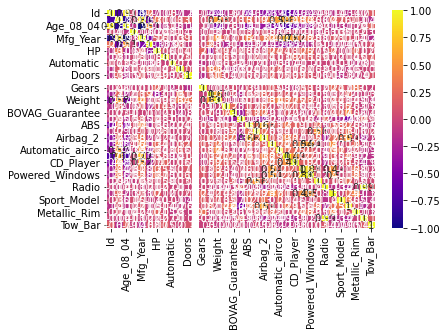

In [24]:
# heatmap
sns.heatmap(data=corel,
           annot=True,
           cmap='plasma',
           vmin=-1,
           vmax=1)

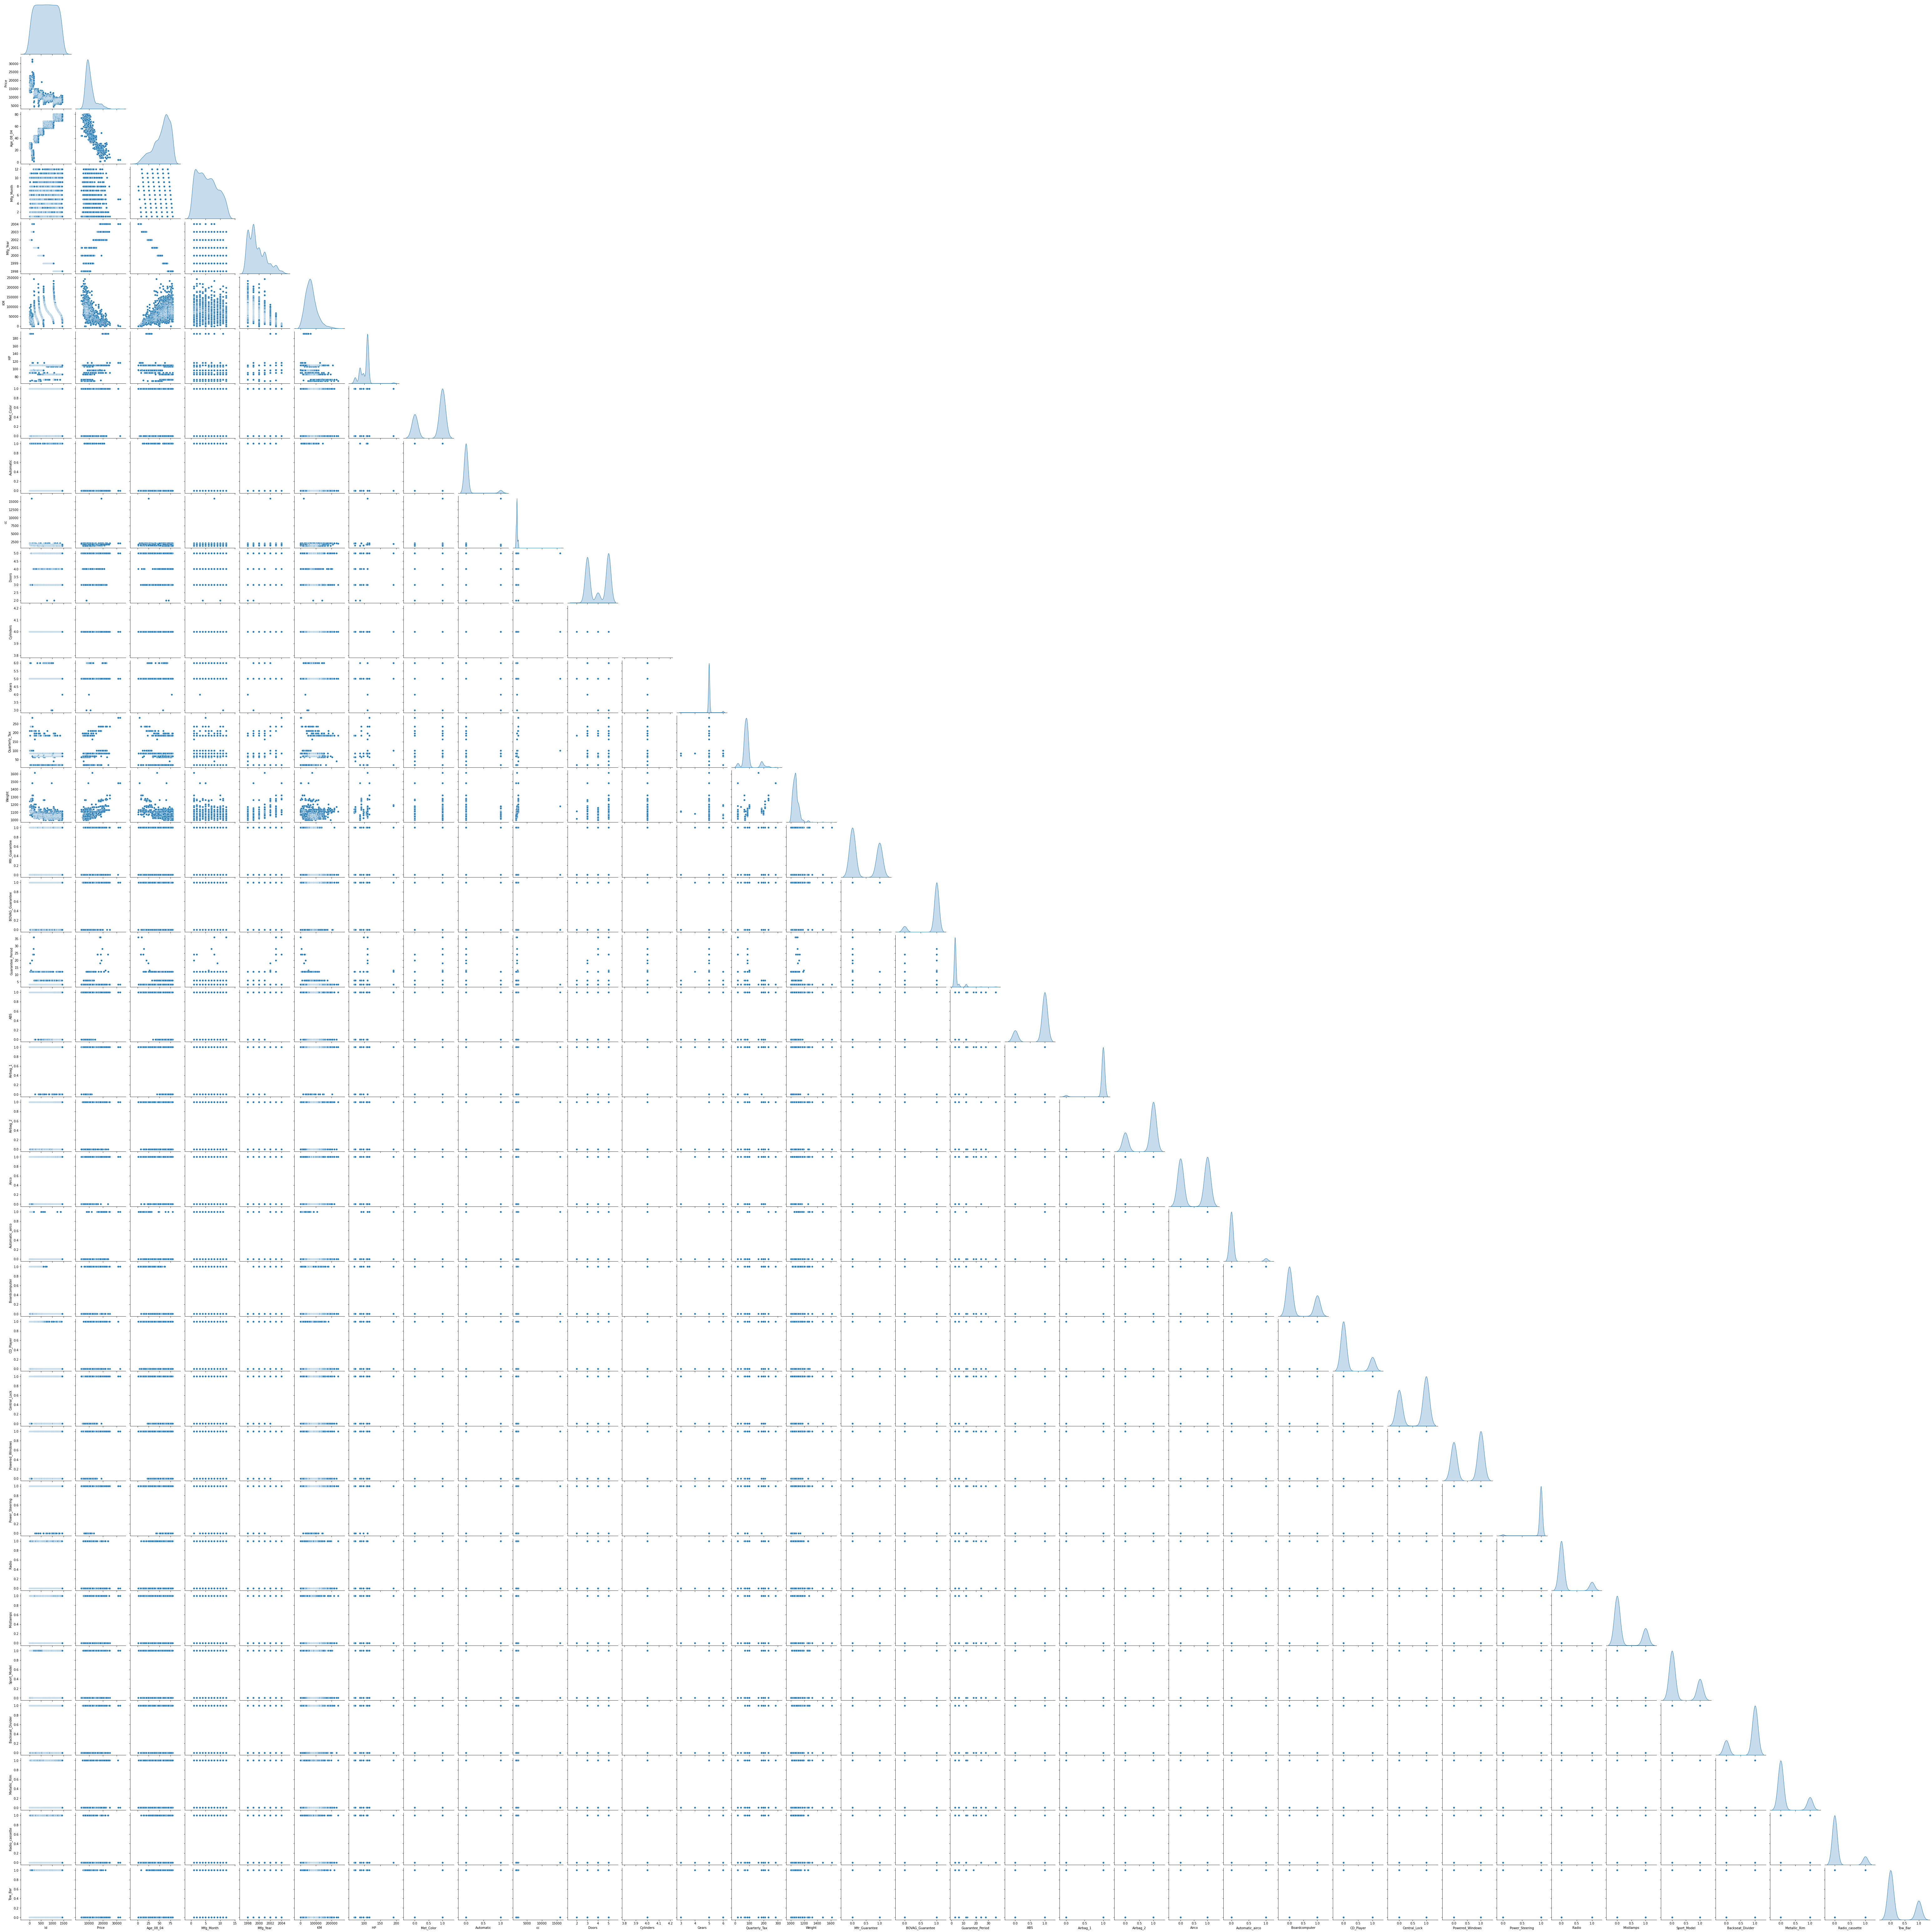

In [25]:
# pairplot
sns.pairplot(toyo,
            corner=True,
            diag_kind='kde');

In [27]:
toyo2=pd.concat([toyo.iloc[:,2:4],toyo.iloc[:,6:7],toyo.iloc[:,8:9],toyo.iloc[:,12:14],toyo.iloc[:,15:18]])
toyo2

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13750.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13950.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14950.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13750.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1431,NaN,NaN,NaN,NaN,NaN,NaN,5.0,69.0,1025.0
1432,NaN,NaN,NaN,NaN,NaN,NaN,5.0,69.0,1015.0
1433,NaN,NaN,NaN,NaN,NaN,NaN,5.0,69.0,1015.0
1434,NaN,NaN,NaN,NaN,NaN,NaN,5.0,69.0,1015.0
